In [1]:
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

print('Libraries imported.')

Libraries imported.


In [2]:
# data
x1 = [-4.9, -3.5, 0, -4.5, -3, -1, -1.2, -4.5, -1.5, -4.5, -1, -2, -2.5, -2, -1.5, 4, 1.8, 2, 2.5, 3, 4, 2.25, 1, 0, 1, 2.5, 5, 2.8, 2, 2]
x2 = [-3.5, -4, -3.5, -3, -2.9, -3, -2.6, -2.1, 0, -0.5, -0.8, -0.8, -1.5, -1.75, -1.75, 0, 0.8, 0.9, 1, 1, 1, 1.75, 2, 2.5, 2.5, 2.5, 2.5, 3, 6, 6.5]

print('Datapoints defined!')


Datapoints defined!


In [3]:
colors_map = np.array(['b', 'r'])
def assign_members(x1, x2, centers):
    compare_to_first_center = np.sqrt(np.square(np.array(x1) - centers[0][0]) + np.square(np.array(x2) - centers[0][1]))
    compare_to_second_center = np.sqrt(np.square(np.array(x1) - centers[1][0]) + np.square(np.array(x2) - centers[1][1]))
    class_of_points = compare_to_first_center > compare_to_second_center
    colors = colors_map[class_of_points + 1 - 1]
    return colors, class_of_points

print('assign_members function defined!')

assign_members function defined!


In [4]:
# update means
def update_centers(x1, x2, class_of_points):
    center1 = [np.mean(np.array(x1)[~class_of_points]), np.mean(np.array(x2)[~class_of_points])]
    center2 = [np.mean(np.array(x1)[class_of_points]), np.mean(np.array(x2)[class_of_points])]
    return [center1, center2]

print('Centers function defined!')

Centers function defined!


In [ ]:
def plot_points(centroids=None, colors='g', figure_title=None):
    # plot the figure
    fig = plt.figure(figsize=(15, 10))  # create a figure object
    ax = fig.add_subplot(1, 1, 1)
    
    centroid_colors = ['bx', 'rx']
    if centroids:
        for (i, centroid) in enumerate(centroids):
            ax.plot(centroid[0], centroid[1], centroid_colors[i], markeredgewidth=5, markersize=20)
    plt.scatter(x1, x2, s=500, c=colors)
    
    # define the ticks
    xticks = np.linspace(-6, 8, 15, endpoint=True)
    yticks = np.linspace(-6, 6, 13, endpoint=True)

    # fix the horizontal axis
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    # add tick labels
    xlabels = xticks
    ax.set_xticklabels(xlabels)
    ylabels = yticks
    ax.set_yticklabels(ylabels)

    # style the ticks
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params('both', length=2, width=1, which='major', labelsize=15)
    
    # add labels to axes
    ax.set_xlabel('x1', fontsize=20)
    ax.set_ylabel('x2', fontsize=20)
    
    # add title to figure
    ax.set_title(figure_title, fontsize=24)

    plt.show()

print('plot_points function defined!')

plot_points function defined!


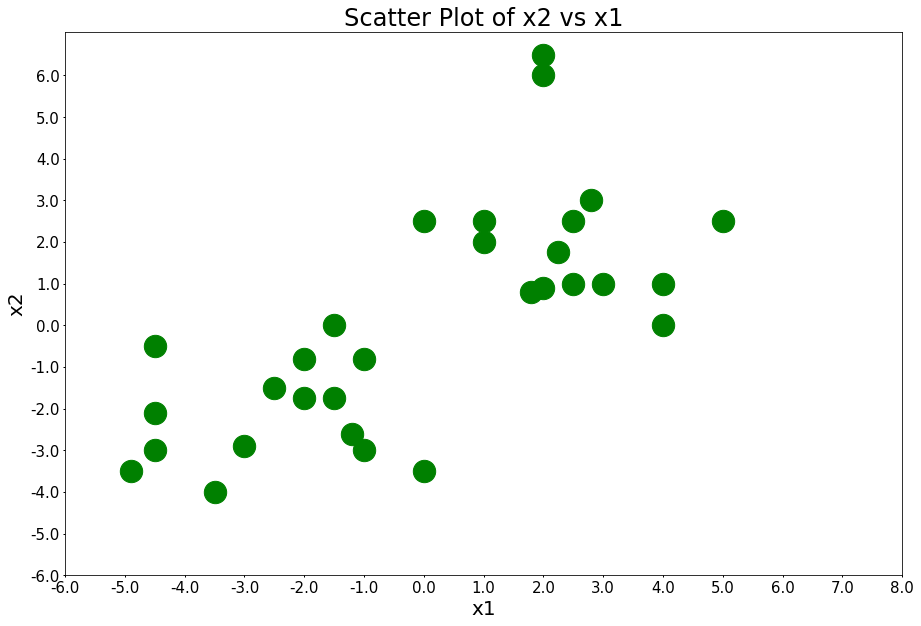

In [ ]:
plot_points(figure_title='Scatter Plot of x2 vs x1')

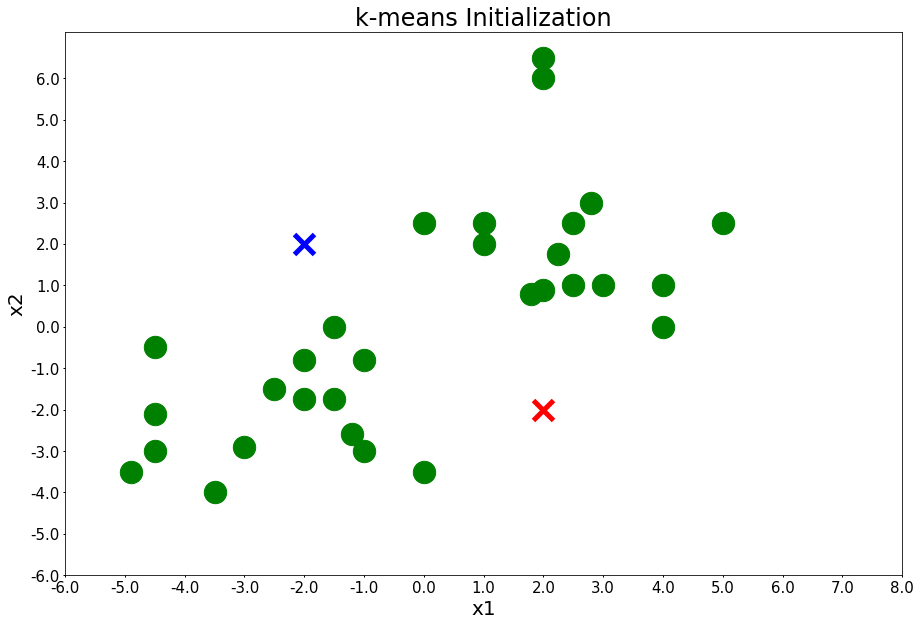

In [ ]:
centers = [[-2, 2], [2, -2]]
plot_points(centers, figure_title='k-means Initialization')

Iteration 1 - Press Enter to update the members of each cluster


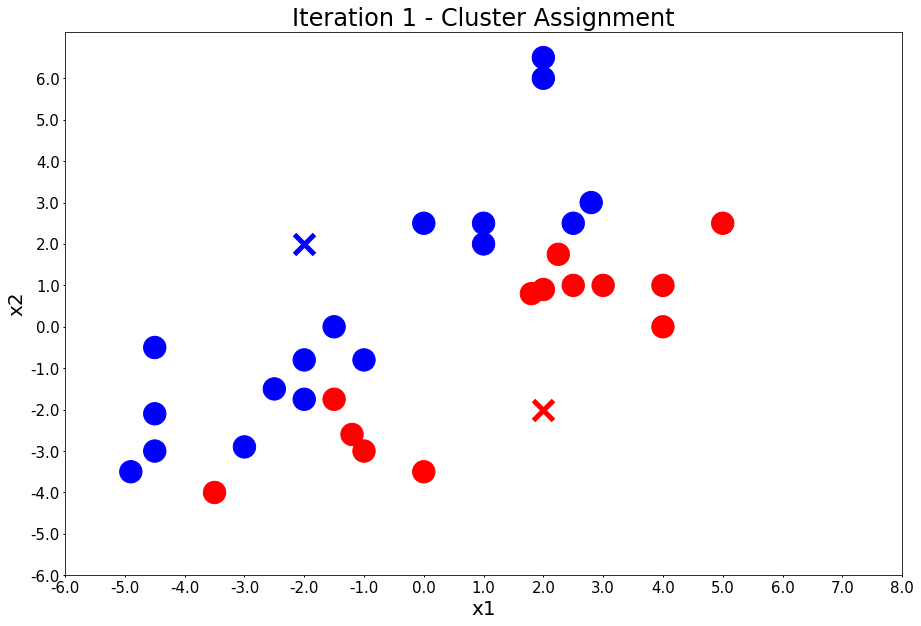

In [ ]:
number_of_iterations = 4
for i in range(number_of_iterations):
    input('Iteration {} - Press Enter to update the members of each cluster'.format(i + 1))
    colors, class_of_points = assign_members(x1, x2, centers)
    title = 'Iteration {} - Cluster Assignment'.format(i + 1)
    plot_points(centers, colors, figure_title=title)
    input('Iteration {} - Press Enter to update the centers'.format(i + 1))
    centers = update_centers(x1, x2, class_of_points)
    title = 'Iteration {} - Centroid Update'.format(i + 1)
    plot_points(centers, colors, figure_title=title)

In [ ]:
np.random.seed(0) #First, we need to set up a random seed. We use the Numpy's random.seed() function, and we will set the seed to 0. In other words, random.seed(0).

#### Next we will be making random clusters of points by using the make_blobs class. The make_blobs class can take in many inputs, but we will use these specific ones.

##### Input
##### n_samples: 
The total number of points equally divided among clusters.
Value will be: 5000
##### centers: 
The number of centers to generate, or the fixed center locations.
Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]]
##### cluster_std: 
The standard deviation of the clusters.
Value will be: 0.9


##### Output
X: Array of shape [n_samples, n_features]. (Feature Matrix)
The generated samples.
y: Array of shape [n_samples]. (Response Vector)
The integer labels for cluster membership of each sample.

In [ ]:
X, y = make_blobs(n_samples=5000, centers=[[4, 4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

In [ ]:
plt.figure(figsize=(15, 10))
plt.scatter(X[:, 0], X[:, 1], marker='.')

#####Setting up k-means
Now that we have our random data, let's set up our k-means clustering.

The KMeans class has many parameters that can be used, but we will use these three:

###### init: Initialization method of the centroids.
Value will be: "k-means++". k-means++ selects initial cluster centers for k-means clustering in a smart way to speed up convergence.
###### n_clusters: 
The number of clusters to form as well as the number of centroids to generate.
Value will be: 4 (since we have 4 centers)
###### n_init: 
Number of times the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
Value will be: 12

#### Initialize KMeans with these parameters, where the output parameter is called k_means.

In [ ]:
k_means = KMeans(init="k-means++", n_clusters=4, n_init=12)

In [ ]:
k_means.fit(X) #Now let's fit the KMeans model with the feature matrix we created above, X .

In [ ]:
k_means_labels = k_means.labels_   # Grab the labels for each point in the model using KMeans .labels_ attribute and save it as k_means_labels.
k_means_labels 

In [ ]:
k_means_cluster_centers = k_means.cluster_centers_ #We will also get the coordinates of the cluster centers using KMeans .cluster_centers_ and save it as k_means_cluster_centers.
k_means_cluster_centers

### Ploting the generated Random numbers and the KMeans.

In [ ]:
# initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(15, 10))

# colors uses a color map, which will produce an array of colors based on
# the number of labels. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# create a plot
ax = fig.add_subplot(1, 1, 1)

# loop through the data and plot the datapoints and centroids.
# k will range from 0-3, which will match the number of clusters in the dataset.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # create a list of all datapoints, where the datapoitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # plot the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # plot the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# title of the plot
ax.set_title('KMeans')

# remove x-axis ticks
ax.set_xticks(())

# remove y-axis ticks
ax.set_yticks(())

# show the plot
plt.show()

In [ ]:
import pandas as pd
!wget -q -O 'customer_segmentation.csv' https://cocl.us/customer_dataset
print('Data downloaded!')

In [ ]:
customers_df = pd.read_csv('customer_segmentation.csv')
customers_df.head()

In [ ]:
df = customers_df.drop('Address', axis=1)
df.head()

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
X = df.values[:,1:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

In [ ]:
num_clusters = 3

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)

In [ ]:
df["Labels"] = labels
df.head(5)

In [ ]:
df.groupby('Labels').mean()

k-means will partition your customers into three groups since we specified the algorithm to generate 3 clusters. The customers in each cluster are similar to each other in terms of the features included in the dataset.

Now we can create a profile for each group, considering the common characteristics of each cluster. For example, the 3 clusters can be:

    OLDER, HIGH INCOME, AND INDEBTED
    MIDDLE AGED, MIDDLE INCOME, AND FINANCIALLY RESPONSIBLE
    YOUNG, LOW INCOME, AND INDEBTED

However, you can devise your own profiles based on the means above and come up with labels that you think best describe each cluster.
